<a href="https://colab.research.google.com/github/iseequeue/pytorch/blob/main/00_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Fri Mar  3 12:53:26 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0    25W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import torch
torch.__version__

'1.13.1+cu116'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Intro to tensor

In [4]:
scalar = torch.tensor(7)
print(scalar)
vector = torch.tensor([7, 7])
print(vector)
MATRIX = torch.tensor([ [1, 2], 
                       [3, 4]])
print(MATRIX)

tensor(7)
tensor([7, 7])
tensor([[1, 2],
        [3, 4]])


In [5]:
scalar.item()

7

In [6]:
print(MATRIX.ndim)
print(MATRIX.shape)

2
torch.Size([2, 2])


In [7]:
# TENSOR
TENSOR = torch.tensor([[[1, 2, 3],
                        [4, 5, 6],
                        [7, 8, 9]]])
print(TENSOR, TENSOR.ndim, TENSOR.shape )
TENSOR[0]

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]]) 3 torch.Size([1, 3, 3])


tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

### Random tensor

In [8]:
random_tensor = torch.rand(3, 4)
random_tensor 

tensor([[0.8889, 0.7396, 0.8181, 0.0524],
        [0.6057, 0.6757, 0.6237, 0.2334],
        [0.6972, 0.4076, 0.7707, 0.8748]])

In [9]:
random_image_tensor = torch.rand(size=(224, 224, 3))*256 #height, width, colors RGB
random_image_tensor.ndim, random_image_tensor.shape, random_image_tensor

(3, torch.Size([224, 224, 3]), tensor([[[198.0621,  38.5637, 112.9176],
          [ 60.3450,  99.0155,  35.5921],
          [102.6625,  77.8804,  89.4562],
          ...,
          [164.8963, 124.1711, 155.9382],
          [186.8041, 217.8608,  17.3276],
          [153.6959,   2.4015, 142.4336]],
 
         [[244.1767, 212.0388, 139.0066],
          [ 14.2911,  74.8039, 115.3737],
          [103.6790,  51.5659,  42.4862],
          ...,
          [189.2498, 163.4261,  68.3125],
          [  8.4630,  62.6019, 253.3285],
          [ 45.4773,  83.2363,  36.4483]],
 
         [[ 88.5624, 178.0847,  14.0709],
          [ 50.0391, 223.1153, 140.4644],
          [ 87.5183,  22.9699, 109.6750],
          ...,
          [188.5256,  48.8217, 225.3058],
          [ 70.3485,  57.6418, 114.1523],
          [164.7187,  22.6947,  24.0592]],
 
         ...,
 
         [[ 16.8356,   2.1400, 157.1228],
          [ 12.3920,  70.6854, 220.0670],
          [254.3742,  99.1075, 238.2328],
          ...,
   

In [10]:
from google.colab.patches import cv2_imshow

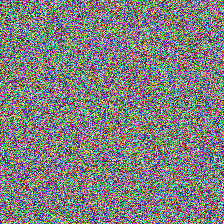

In [11]:
cv2_imshow(np.array(random_image_tensor, dtype=np.uint8))

## Zeros and ones

In [12]:
zeros = torch.zeros(size=(3, 4))
print(zeros)
ones = torch.ones(size=(3, 4))
print(ones)
print(zeros.dtype, ones.dtype)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
torch.float32 torch.float32


## Range tensors

In [13]:
one_to_ten = torch.arange(start=0, end=11, step = 1)
one_to_ten

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [14]:
#tensor like
ten_zeros = torch.zeros_like(one_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Tensor datatypes

In [15]:
t32 = torch.tensor([3.0, 6.0, 9.0],
                 dtype=None,  # float32
                 device=None, #'cuda' -- must be on the same device
                 requires_grad=False)
t32

tensor([3., 6., 9.])

In [16]:
t16 = t32.type(torch.float16)
print(t16, t16.type)

tensor([3., 6., 9.], dtype=torch.float16) <built-in method type of Tensor object at 0x7f58a6d20360>


In [17]:
q=t16*t32
print(q, q.type)

tensor([ 9., 36., 81.]) <built-in method type of Tensor object at 0x7f58a6d20130>


## Manipulate tensors(tensor operations)

In [18]:
tensor1 = torch.tensor([1, 2, 3])
print(tensor1 + 100, tensor1*10, tensor1 - 10, torch.mul(tensor1, 10))

tensor([101, 102, 103]) tensor([10, 20, 30]) tensor([-9, -8, -7]) tensor([10, 20, 30])


In [19]:
t1 = torch.tensor([1, 2, 3])
t2 = torch.tensor([4, 5, 6])
print(t1@t2)
print(torch.matmul(t1, t2))

tensor(32)
tensor(32)


In [20]:
tensor = torch.rand(100000)

In [21]:
%%time
value = 0
for i in range(len(tensor)):
  value+=tensor[i]*tensor[i]
print(value)

tensor(33361.7148)
CPU times: user 1.03 s, sys: 2.36 ms, total: 1.03 s
Wall time: 1.12 s


In [22]:
%%time
print(tensor@tensor)

tensor(33361.9609)
CPU times: user 1.97 ms, sys: 0 ns, total: 1.97 ms
Wall time: 2.46 ms


## min max sum mean

In [23]:
t=torch.arange(0, 11, 1.0)
print(t.mean(), t.max(), t.min(), t.sum(), t.argmax(), t.argmin() )

tensor(5.) tensor(10.) tensor(0.) tensor(55.) tensor(10) tensor(0)


## reshaping stacking squeezing unsqueezing

In [24]:
x = torch.arange(1, 10, 1.0)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [25]:
x_reshaped = x.reshape(1, 1, 9)
x_reshaped, x_reshaped.shape

(tensor([[[1., 2., 3., 4., 5., 6., 7., 8., 9.]]]), torch.Size([1, 1, 9]))

In [26]:
z = x.view(1, 9)
z, z.shape # shares memory

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [27]:
x_stacked = torch.stack([x, x,  x, x], dim = 1)
x_stacked

tensor([[1., 1., 1., 1.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.],
        [4., 4., 4., 4.],
        [5., 5., 5., 5.],
        [6., 6., 6., 6.],
        [7., 7., 7., 7.],
        [8., 8., 8., 8.],
        [9., 9., 9., 9.]])

In [28]:
x_reshaped, x_reshaped.shape

(tensor([[[1., 2., 3., 4., 5., 6., 7., 8., 9.]]]), torch.Size([1, 1, 9]))

In [29]:
x_reshaped.squeeze()

tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [30]:
x_reshaped.squeeze().shape

torch.Size([9])

In [31]:
x_reshaped.unsqueeze(dim=3)

tensor([[[[1.],
          [2.],
          [3.],
          [4.],
          [5.],
          [6.],
          [7.],
          [8.],
          [9.]]]])

In [32]:
x = torch.randn(2, 3, 5)
print(x)
print(x.size())
print(torch.permute(x, (2, 0, 1)).size())
print(torch.permute(x, (2, 0, 1)))

tensor([[[-1.7465,  2.0640,  0.0602,  0.9477, -0.6320],
         [ 0.2745, -0.5359, -1.1501,  0.5946,  0.7160],
         [ 0.6392, -0.5969,  0.4414, -1.3718, -0.7983]],

        [[ 0.0167, -0.4314, -0.2827,  0.0530, -0.2274],
         [-1.1039, -1.2416,  0.6899,  1.6428, -0.2388],
         [ 1.0195,  0.3242,  0.8288, -0.6479, -0.2028]]])
torch.Size([2, 3, 5])
torch.Size([5, 2, 3])
tensor([[[-1.7465,  0.2745,  0.6392],
         [ 0.0167, -1.1039,  1.0195]],

        [[ 2.0640, -0.5359, -0.5969],
         [-0.4314, -1.2416,  0.3242]],

        [[ 0.0602, -1.1501,  0.4414],
         [-0.2827,  0.6899,  0.8288]],

        [[ 0.9477,  0.5946, -1.3718],
         [ 0.0530,  1.6428, -0.6479]],

        [[-0.6320,  0.7160, -0.7983],
         [-0.2274, -0.2388, -0.2028]]])


In [33]:
import torch
x=torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape, x[0]

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]), torch.Size([1, 3, 3]), tensor([[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]))

In [34]:
x[0][0][0]

tensor(1)

In [35]:
x[:, 0], x[:,1,0 ]

(tensor([[1, 2, 3]]), tensor([4]))

## Pytorch and numpy

In [36]:
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
array, array.dtype,  tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 dtype('float64'),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [37]:
array = array+1
array, tensor

(array([2., 3., 4., 5., 6., 7., 8.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [38]:
tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
tensor, numpy_tensor, numpy_tensor.dtype

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32),
 dtype('float32'))

In [39]:
tensor+=1
tensor, numpy_tensor

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([2., 2., 2., 2., 2., 2., 2.], dtype=float32))

## Reproducability

In [40]:
RANDOM_SEED = 17
torch.manual_seed(RANDOM_SEED)

In [41]:
torch.manual_seed(17)
print(torch.rand(3,3))
torch.manual_seed(17)
print(torch.rand(3,3))

tensor([[0.4342, 0.5351, 0.8302],
        [0.1239, 0.0293, 0.5494],
        [0.3825, 0.5463, 0.4683]])
tensor([[0.4342, 0.5351, 0.8302],
        [0.1239, 0.0293, 0.5494],
        [0.3825, 0.5463, 0.4683]])


## Running on GPUs

In [42]:
 !nvidia-smi

Fri Mar  3 12:57:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0    26W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [45]:
torch.cuda.is_available()

True

In [47]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [50]:
tensor = torch.tensor([1, 2, 3])
print(tensor, tensor.device)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3]) cpu


tensor([1, 2, 3], device='cuda:0')

In [54]:
tensor_on_gpu.cpu().numpy()

array([1, 2, 3])

## Excercises

In [56]:
 t = torch.rand(7,7)
 t

tensor([[0.8332, 0.1881, 0.8861, 0.1981, 0.8292, 0.1838, 0.4057],
        [0.0857, 0.0790, 0.2276, 0.5196, 0.1927, 0.6934, 0.6373],
        [0.2512, 0.0572, 0.3289, 0.1095, 0.9190, 0.6748, 0.3235],
        [0.0211, 0.1005, 0.8881, 0.4026, 0.7276, 0.9617, 0.3762],
        [0.7566, 0.8149, 0.0067, 0.7674, 0.3557, 0.5313, 0.2605],
        [0.5533, 0.2901, 0.4313, 0.9055, 0.1943, 0.5258, 0.6361],
        [0.3020, 0.2296, 0.4642, 0.0173, 0.9359, 0.8045, 0.9365]])

In [58]:
t @ torch.rand(1, 7).T

tensor([[1.4492],
        [0.9016],
        [0.8579],
        [1.4174],
        [1.1205],
        [1.3256],
        [1.4961]])

In [59]:
torch.manual_seed(17)
torch.rand(7, 7) @ torch.rand(1, 7).T

tensor([[1.8646],
        [0.9665],
        [0.7699],
        [0.9026],
        [1.9079],
        [2.3049],
        [1.9849]])

In [61]:
torch.cuda.manual_seed_all(13)

In [62]:
torch.manual_seed(1234)
t1 = torch.rand(2,3)
t2 = torch.rand(2,3)
t1_on_gpu = t1.to(device)
t2_on_gpu = t2.to(device)
t1_on_gpu @ t2_on_gpu.T

tensor([[0.3647, 0.4709],
        [0.5184, 0.5617]], device='cuda:0')

In [64]:
%%time
t1 = torch.rand(2000,3000)
t2 = torch.rand(2000,3000)
t1 @ t2.T

CPU times: user 377 ms, sys: 21.8 ms, total: 399 ms
Wall time: 396 ms


tensor([[755.6994, 737.2620, 752.6906,  ..., 765.2333, 759.4401, 752.1733],
        [754.5306, 733.7271, 755.7218,  ..., 773.9648, 761.2938, 759.0201],
        [732.1247, 733.5848, 743.1209,  ..., 758.9544, 747.1078, 743.8867],
        ...,
        [751.9510, 739.3509, 744.2640,  ..., 764.4525, 758.4830, 749.6667],
        [752.2545, 738.8751, 759.6933,  ..., 768.4635, 755.1854, 763.2642],
        [724.8327, 710.9528, 723.4463,  ..., 731.2103, 735.0467, 732.1033]])

In [65]:
%%time
t2_on_gpu = t2.to(device)
t1_on_gpu = t1.to(device)

CPU times: user 13.8 ms, sys: 0 ns, total: 13.8 ms
Wall time: 14.8 ms


In [68]:
%%time
a = t1_on_gpu @ t2_on_gpu.T

CPU times: user 535 µs, sys: 949 µs, total: 1.48 ms
Wall time: 842 µs


In [69]:
a.max(), a.min(), a.argmax(), a.argmin()

(tensor(807.9458, device='cuda:0'),
 tensor(687.5092, device='cuda:0'),
 tensor(315765, device='cuda:0'),
 tensor(3478063, device='cuda:0'))

In [73]:
torch.manual_seed(7)
t10 = torch.rand(1, 1, 1, 10)
t10, t10.shape

(tensor([[[[0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297,
            0.3653, 0.8513]]]]), torch.Size([1, 1, 1, 10]))

In [83]:
t10.squeeze().shape, t10.squeeze()

(torch.Size([10]),
 tensor([0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297, 0.3653,
         0.8513]))